# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(97, 2)

In [ ]:
print(data)
print(data.shape)

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [60]:
# rajoutons l'ordonnée à l'origine theta 0
intercept = np.ones((data.shape[0],1))
# concatenation de data[:, 0] et intercept qui contient que des 1 (on l'utilise a cause de beta )
X = np.column_stack((intercept,data[:,0]))

print (X.shape)
y = data[:, 1]

(97, 2)


Text(0, 0.5, 'Bénéfice x1000')

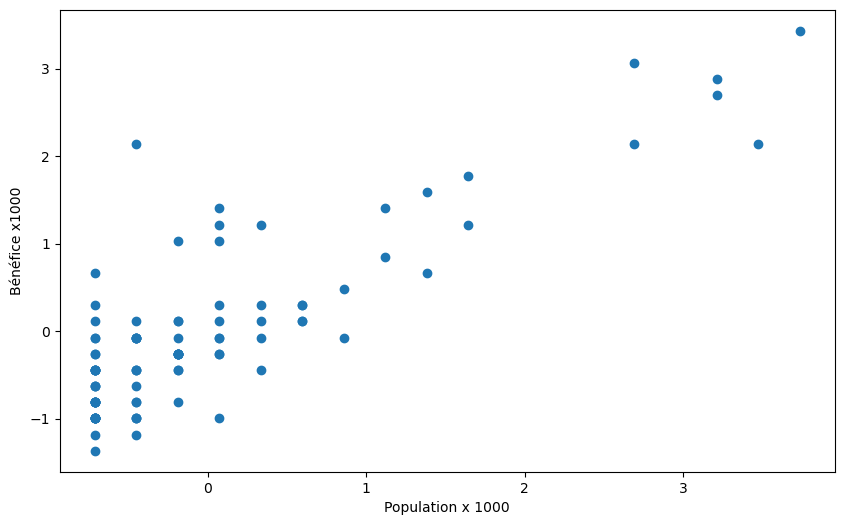

In [61]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='o')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [62]:
def model (X,theta):
    return X.dot(theta)

F = model(X,[0,0])


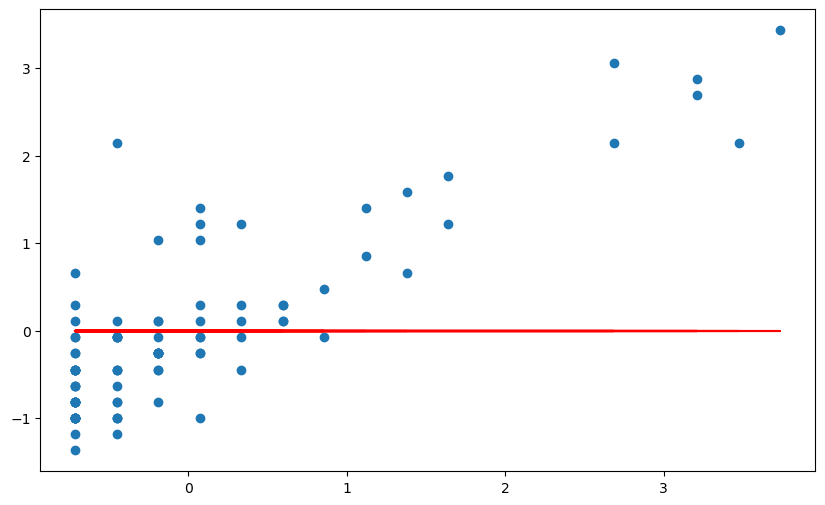

In [63]:
plt.scatter(X[:,1],y)
plt.plot(X,F, c='r')

In [64]:
# calculer l'erreur sans utilise la bib numpy :
def computeCostNonVect(X, y, theta):
    m = X.shape[0]
    predict = np.zeros(m)
    
    # pour chaque element de dataset on calcule la valeur de y_pred en utilisant la vecteur theta
    for i in range(m):
        predict[i] = X[i][0]*theta[0] + X[i][1]*theta[1]
    
    # somme des erreur 
    cout = 0
    for i in range(m):
        cout = cout + ((predict[i] - y[i]) ** 2)
    
    return (1 / (2 * m)) * cout


In [65]:
computeCostNonVect(X, y, [0,0])

0.5

In [66]:
# clacule de l'erreur en utilisant la bib numpy
def computeCost(X, y, theta):
    
    m = len(y)
    predict = X.dot(theta)
    error = predict - y
    cost = 1/(2*m) * np.sum(error**2)
    return cost
    # calculer le vecteur de prediction

  

In [67]:
computeCost(X, y, [0,0])


0.5000000000000002

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [68]:
def grad(X , y , theta):
    m = len(y)
    gradient = X.T.dot(model(X,theta)-y)
    return (1/m)* gradient

In [111]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    # pour stocker la valeur de la fonction de cout a chaque iteration
    cost_history = np.zeros(iterations)
    
    
    for i in range(iterations):
        theta = theta- alpha * grad( X, y , theta)
        cost_history[i] = computeCost(X, y, theta)
        
    return cost_history , theta
        

In [112]:
iter = 100
cost_history, theta= gradientDescent(X, y, [0,0], alpha=0.1, iterations=iter)

In [113]:
# (100 or 500 or 1000 or 2000) and (0.03 or 0.1 or 0.5) -> 0.14
# (100) and (0.01) -> 0.19
cost_history[-1]

0.14556737020001081

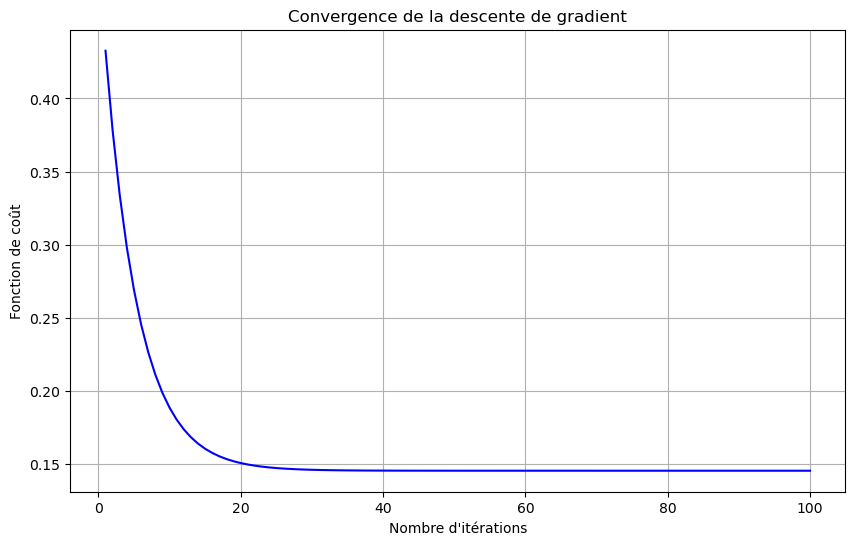

In [114]:
# Tracer la convergence de la fonction de coût
plt.plot(range(1, iter + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Fonction de coût')
plt.title('Convergence de la descente de gradient')
plt.show()

In [105]:
theta

array([-4.28065372e-17,  8.41919001e-01])

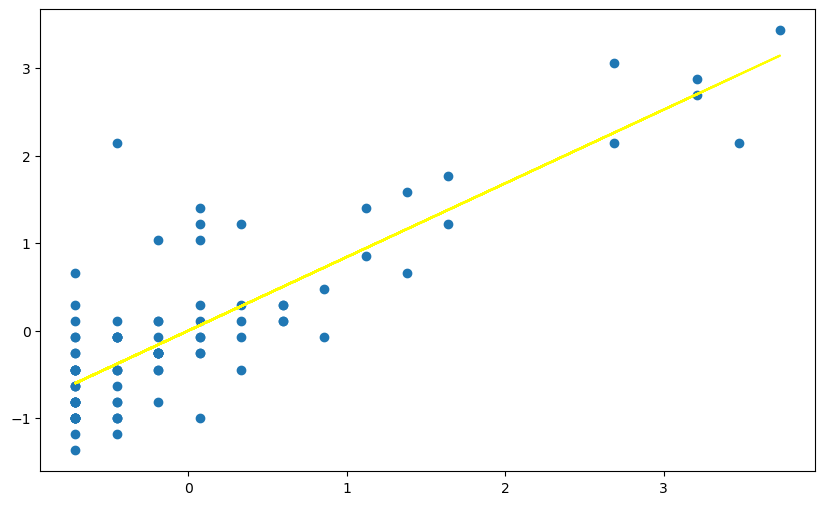

In [107]:
F = model(X, theta)

plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], F, c='yellow')
plt.show()

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [13]:
theta = np.zeros((2, 1))

Calculer le cout initial

In [ ]:
initialCost=computeCost(X, y, theta)

Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
iterations = 1500
alpha = 0.01
# Appel
theta = gradientDescent(X, y, theta, alpha, iterations)

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

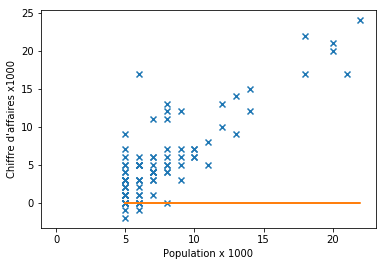

In [ ]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

Prédire des valeurs de y

In [ ]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta)
predict1

array([0.])

In [ ]:
predict2 = np.matmul([1, 7],theta)
predict2

array([0.])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [ ]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [ ]:
# d'abord créer X et y


In [ ]:
# redéfinissez vos fonctions de coût si cela est necessaire


Mise à l'échelle des données

Normalisation des données en moyenne = 0

Appliquer la descente du gradient à plusieurs variables

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [ ]:
# bonne chance